In [3]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:

# Load the CSV file into a DataFrame
df_crypto_market_data = pd.read_csv('Resources/crypto_market_data.csv')

# Set the 'coin_id' column as the index of the DataFrame
df_crypto_market_data.set_index('coin_id', inplace=True)

# Display the first few rows of the DataFrame to verify
df_crypto_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [5]:
# Generate summary statistics
df_crypto_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
df_crypto_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [7]:
# Review the columns int the DataFrame
df_crypto_market_data.columns


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [8]:
df_crypto_market_data.index

Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')

In [9]:
df_crypto_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# market_data_scaled_df = StandardScaler().fit_transform[market_data_df]

# Scaling the numeric columns: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen' columns
df_market_data_scaled=StandardScaler().fit_transform(df_crypto_market_data)
# Display the arrays. 
df_market_data_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [11]:
# Create a DataFrame with the scaled data
market_data_scaled= pd.DataFrame(df_market_data_scaled, columns=df_crypto_market_data.columns)

# Copy the index (coin_id) from the original DataFrame to the new DataFrame
market_data_scaled['coin_id']= df_crypto_market_data.index

# Set the coinid column as index
market_data_scaled.set_index('coin_id', inplace=True)

# Display sample data
market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
from sklearn.cluster import KMeans
import pandas as pd
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}   

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,55.763391
6,7,44.237520
7,8,41.068743
8,9,36.933822
9,10,29.836181


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

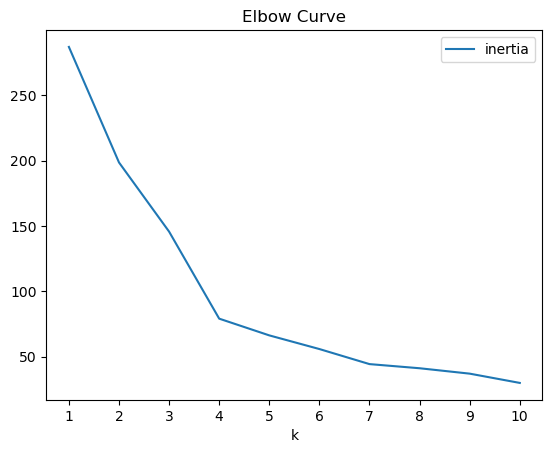

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x='k', 
                   y='inertia', 
                   title='Elbow Curve',
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [14]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [15]:
# Fit the K-Means model using the scaled data
k_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = k_model.predict(df_market_data_scaled)

# View the resulting array of cluster values.
predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [17]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame directly
df_market_data_predictions = market_data_scaled.copy()

In [18]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions["PredictedCluster"] = predictions

# Display sample data with the new predicted cluster column
df_market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,PredictedCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

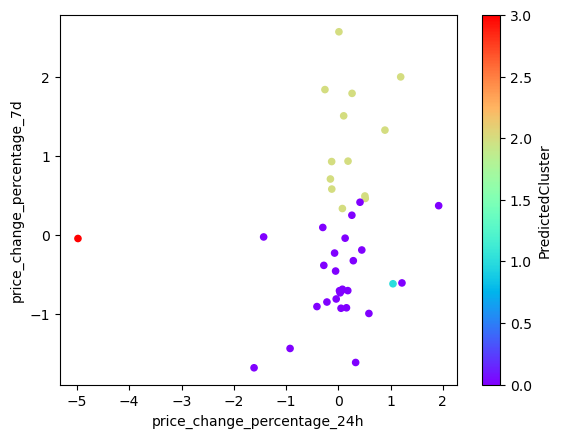

In [19]:
df_market_data_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="PredictedCluster",
    colormap="rainbow"
)

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
PCA_model = PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
Market_PCA_Data = PCA_model.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
Market_PCA_Data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [22]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
PCA_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [23]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# The PCA data is stored in the pca_data variable.
# The crypto names are stored in the coinid_names variable.
# The coinid column is set as the index.
market_data_pca = pd.DataFrame(Market_PCA_Data, columns=["PCA_1","PCA_2","PCA_3"])

# Creating a DataFrame with the PCA data
#market_data_pca.set_index('coinid', inplace=True)

# Copy the crypto names from the original data
# crypto_names = df_market_data_scaled['coinid'].copy()

# Set the coinid column as index
# df_pca = pd.DataFrame(df_market_data_scaled, columns=market) 
#df_pca['coinid'] = crypto_names # Adding the copied crypto names as a new column in the DataFrame.
# df_pca.set_index('coinid', inplace=True)  # Setting the 'coinid' column as the index.
# Display sample data
market_data_pca.head() # Display the first few rows to check the DataFrame.


,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values to try, using a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values for each k-value
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values:
    # Create a KMeans model using the loop counter for the number of clusters
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    # Fit the model to the data using PCA DataFrame
    k_model.fit(df_market_data_scaled)
    # Append the model.inertia_ (which measures clustering quality) to the inertia list
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df.head(10))


    k     inertia
0   1  287.000000
1   2  198.571818
2   3  145.635748
3   4   79.022435
4   5   66.217780
5   6   55.763391
6   7   44.237520
7   8   41.068743
8   9   36.933822
9  10   29.836181


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

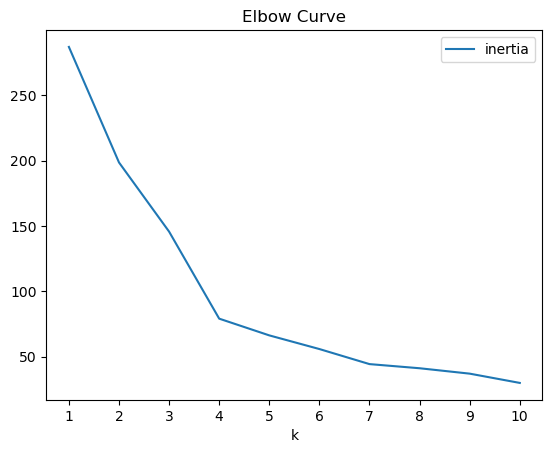

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x='k', 
                y='inertia', 
                title='Elbow Curve',
                xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=k, random_state=42)

In [27]:
# Fit the K-Means model using the PCA data
kmeans = KMeans(n_clusters=3, random_state=0).fit(market_data_pca)

/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = kmeans.predict(market_data_pca)

# Print the resulting array of cluster values.
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 1 1]


In [29]:
# # Create a copy of the DataFrame with the PCA data
df_market_data_with_clusters = market_data_pca.copy()

# # Add a new column to the DataFrame with the predicted clusters
df_market_data_with_clusters['PredictedCluster'] = predictions

# # Display sample data
print(df_market_data_with_clusters.head())

      PCA_1     PCA_2     PCA_3  PredictedCluster
0 -0.600667  0.842760  0.461595                 1
1 -0.458261  0.458466  0.952877                 1
2 -0.433070 -0.168126 -0.641752                 1
3 -0.471835 -0.222660 -0.479053                 1
4 -1.157800  2.041209  1.859715                 1


In [30]:
df_market_data_with_clusters.columns

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PredictedCluster'], dtype='object')

KeyError: 'PCA_1'

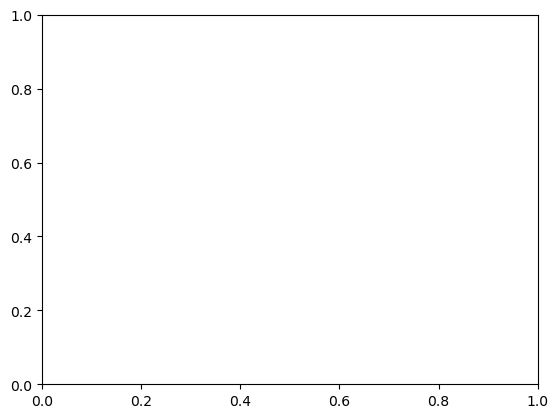

In [33]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Color the data points by the predicted cluster values.
df_market_data_with_clusters.plot.scatter(
    x='PCA_1',
    y='PCA_2',
    by="PredictedCluster"
)

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.
df_market_data_scaled = df_market_data_scaled.set_index(df_market_data_scaled.columns)


AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [ ]:
# Initialize the PCA model specifying the number of components
PCA_model = PCA(n_components=3)

# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components
principal_components = PCA_model.fit_transform(df_crypto_market_data)

# Display sample data
df_crypto_market_data.head(10)